#Анализ NFT рынка


In [1]:
"""2. Дайте его краткое описание. Укажите количество строк и столбцов. По каждой переменной укажите: 
- название и метки к переменной и к значениям, которые она принимает (если есть),
- что она измеряет или отражает, в каких единицах измерения,
- тип переменной: количественная (непрерывная/дискретная), категориальная (номинальная/порядковая/бинарная),
- тип данных в колонке (string, integer, пр.),
- число пустых значений."""
import pandas as pd
df=pd.read_csv("NFT_Top_Collections.csv")
df.head()
"количественная (непрерывная/дискретная), категориальная (номинальная/порядковая/бинарная)"

'количественная (непрерывная/дискретная), категориальная (номинальная/порядковая/бинарная)'

Index: The index of the file. (количественная,дискретная) <br>
Name: The name of the NFT collection.  (категориальная,номинальная)<br>
Volume: The volume of sales from the NFT collection in Solana (SOL).
(количественная,непрерывная) <br>
Volume_USD: The volume of sales from the NFT collection in United States Dollar (USD).(количественная,непрерывная)<br>
Market_Cap: The market capitalization—total value of the collection's items in circulation—in Solana (SOL).(количественная,непрерывная)<br>
MarketCapUSD: The market capitalization—total value of the collection's items in circulation—in United States Dollar (USD).(количественная,непрерывная)<br>
Sales: The number of sales from the NFT collection.(количественная,дискретная)<br>
Floor_Price: The lowest price of any NFT in the collection in Solana (SOL).
(количественная,непрерывная)<br>
FloorPriceUSD: The lowest price of any NFT in the collection in United States Dollar (USD). (количественная,непрерывная)<br>
Average_Price: The average price of an NFT in the collection in Solana (SOL).(количественная,непрерывная)<br>
AveragePriceUSD: The average price of an NFT in the collection in United States Dollar (USD).(количественная,непрерывная)<br>
Owners: The number of owners of NFT's in the collection.(количественная,дискретная)<br>
Assets: The number of items in the collection.(количественная,дискретная)<br>
OwnerAssetRatio: The ownership percentage of all items in the collection.(количественная,непрерывная)<br>
Category: The category of the NFT collection.(категориальная,номинальная)<br>
Website: The associated website of the NFT collection.(категориальная,номинальная)<br>
Logo: The associated image of the NFT collection.(категориальная,номинальная)<br>

In [ ]:
display(f'Строк: {df.shape[0]}, столбцов: {df.shape[1]}')
print()
display(df.dtypes)
print()
df.isna().sum()

'Строк: 592, столбцов: 17'

Index                  int64
Name                  object
Volume               float64
Volume_USD           float64
Market_Cap           float64
Market_Cap_USD       float64
Sales                  int64
Floor_Price          float64
Floor_Price_USD      float64
Average_Price        float64
Average_Price_USD    float64
Owners                 int64
Assets                 int64
Owner_Asset_Ratio    float64
Category              object
Website               object
Logo                  object
dtype: object

Index                  0
Name                   0
Volume                 0
Volume_USD             0
Market_Cap             0
Market_Cap_USD         0
Sales                  0
Floor_Price           48
Floor_Price_USD       48
Average_Price          0
Average_Price_USD      0
Owners                 0
Assets                 0
Owner_Asset_Ratio     49
Category             282
Website              111
Logo                   1
dtype: int64

In [ ]:
"""3 Измените тип данных в столбцах на более подходящий (если применимо)."""
df['Market_Cap_USD'] = df['Market_Cap_USD'].astype('int64')
df.head()
#Значения капитализации рынка лучше рассматривать в целых цислах тк очень большие коэффициенты

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...
1,1,Skeleton Crew Skulls,11381.25,1.670995e+06,106.656000,15659,2075,0.67,98.3694,5.484940,805.298855,103,132,78.03,NaN,https://skeletoncrew.rip/,https://content.solsea.io/files/thumbnail/1633...
2,2,Flippies,6732.19,9.884201e+05,1663.863158,244288,1504,0.80,117.4560,4.476190,657.194239,905,1638,55.25,NaN,https://www.flippies.art/,https://content.solsea.io/files/thumbnail/1632...
3,3,Meerkat Millionaires Country Club,3734.76,5.483375e+05,90.275000,13254,395,3.79,556.4478,9.455089,1388.196109,19,23,82.61,NaN,https://meerkatmillionaires.club/,https://content.solsea.io/files/thumbnail/1632...
4,4,Stylish Studs,3191.15,4.685246e+05,165.000000,24225,729,4.30,631.3260,4.377435,642.694984,28,50,56.00,NaN,https://stylishstuds.io,https://content.solsea.io/files/thumbnail/1632...


In [ ]:
"""4 Рассчитайте новый столбец с данными на основе существующего(их)."""
df['DiffAverageMin'] = df['Average_Price_USD']-df['Floor_Price_USD']
df.head(20)

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo,DiffAverageMin
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...,5134.540100
1,1,Skeleton Crew Skulls,11381.25,1.670995e+06,106.656000,15659,2075,0.67,98.3694,5.484940,805.298855,103,132,78.03,NaN,https://skeletoncrew.rip/,https://content.solsea.io/files/thumbnail/1633...,706.929455
2,2,Flippies,6732.19,9.884201e+05,1663.863158,244288,1504,0.80,117.4560,4.476190,657.194239,905,1638,55.25,NaN,https://www.flippies.art/,https://content.solsea.io/files/thumbnail/1632...,539.738239
3,3,Meerkat Millionaires Country Club,3734.76,5.483375e+05,90.275000,13254,395,3.79,556.4478,9.455089,1388.196109,19,23,82.61,NaN,https://meerkatmillionaires.club/,https://content.solsea.io/files/thumbnail/1632...,831.748309
4,4,Stylish Studs,3191.15,4.685246e+05,165.000000,24225,729,4.30,631.3260,4.377435,642.694984,28,50,56.00,NaN,https://stylishstuds.io,https://content.solsea.io/files/thumbnail/1632...,11.368984


In [4]:
"""5 Разбейте любую интервальную переменную на группы и сделайте её категориальной. Обоснуйте выбранные интервалы/группы. """
df['CategoryOfOAR'] = df['Owner_Asset_Ratio'].apply(lambda x: 'great' if x > 80 else 'good' if x > 60 else 'middle')
df.head(10)
# Процент владения коллекцией сказывается на популярности коллекций 
#b поэтому мы разбили на такие группы , чтобы было легче анализировать в дальнейшем

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo,CategoryOfOAR
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969.915600,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...,good
1,1,Skeleton Crew Skulls,11381.25,1.670995e+06,106.656000,15659.233920,2075,0.67,98.3694,5.484940,805.298855,103,132,78.03,NaN,https://skeletoncrew.rip/,https://content.solsea.io/files/thumbnail/1633...,good
2,2,Flippies,6732.19,9.884201e+05,1663.863158,244288.388800,1504,0.80,117.4560,4.476190,657.194239,905,1638,55.25,NaN,https://www.flippies.art/,https://content.solsea.io/files/thumbnail/1632...,middle
3,3,Meerkat Millionaires Country Club,3734.76,5.483375e+05,90.275000,13254.175500,395,3.79,556.4478,9.455089,1388.196109,19,23,82.61,NaN,https://meerkatmillionaires.club/,https://content.solsea.io/files/thumbnail/1632...,great
4,4,Stylish Studs,3191.15,4.685246e+05,165.000000,24225.300000,729,4.30,631.3260,4.377435,642.694984,28,50,56.00,NaN,https://stylishstuds.io,https://content.solsea.io/files/thumbnail/1632...,middle
5,5,I'M AIKO,2904.70,4.264681e+05,2530.877143,371583.382100,1411,1.20,176.1840,2.058611,302.245254,599,1206,49.67,"Art,Collectibles,Graphics,2D,Image",https://aiko.io,https://content.solsea.io/files/thumbnail/1633...,middle
6,6,Crypto Idolz,2315.74,3.399969e+05,1168.041981,171491.923700,1418,0.60,88.0920,1.633103,239.772177,244,529,46.12,NaN,https://cryptoidolz.com/,https://content.solsea.io/files/thumbnail/1632...,middle
7,7,Megalodon Rogue Shark Tooth,2116.61,3.107607e+05,60.050375,8816.596058,5229,0.04,5.8728,0.404783,59.430231,946,1309,72.27,NaN,https://t.co/ra8GsIsSz7?amp=1,https://content.solsea.io/files/thumbnail/1635...,good
8,8,CorruptCatz,1983.92,2.912791e+05,345.790000,50768.887800,1489,0.10,14.6820,1.332384,195.620641,636,916,69.43,NaN,https://corruptcatz.com,https://content.solsea.io/files/thumbnail/1633...,good
9,9,Meta Waifus,1844.59,2.708227e+05,989.491267,145277.107800,1156,1.27,186.4614,1.595666,234.275695,376,643,58.48,"3D,PFP,Metaverse,Art,Collectibles",https://metawaifus.com,https://content.solsea.io/files/thumbnail/1637...,middle


In [ ]:
"""6 Сформируйте срез по таблице и транспонируйте его."""
df[1:5].T

,1,2,3,4
Index,1,2,3,4
Name,Skeleton Crew Skulls,Flippies,Meerkat Millionaires Country Club,Stylish Studs
Volume,11381.25,6732.19,3734.76,3191.15
Volume_USD,1670995.125,988420.1358,548337.4632,468524.643
Market_Cap,106.656,1663.863158,90.275,165.0
Market_Cap_USD,15659,244288,13254,24225
Sales,2075,1504,395,729
Floor_Price,0.67,0.8,3.79,4.3
Floor_Price_USD,98.3694,117.456,556.4478,631.326
Average_Price,5.48494,4.47619,9.455089,4.377435


In [ ]:
"""7 Отсортируйте значения по нескольким полям (многоуровневая сортировка)
 и выведите 20 первых строк таблицы,
  содержащих столбцы с переменными, по которым проводилась сортировка. """
df.sort_values(by=["Volume","Volume_USD","Owner_Asset_Ratio"],ascending =[False,False, False]).head(20)

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo,DiffAverageMin,CategoryOfOAR
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...,5134.540100,good
1,1,Skeleton Crew Skulls,11381.25,1.670995e+06,106.656000,15659,2075,0.67,98.3694,5.484940,805.298855,103,132,78.03,NaN,https://skeletoncrew.rip/,https://content.solsea.io/files/thumbnail/1633...,706.929455,good
2,2,Flippies,6732.19,9.884201e+05,1663.863158,244288,1504,0.80,117.4560,4.476190,657.194239,905,1638,55.25,NaN,https://www.flippies.art/,https://content.solsea.io/files/thumbnail/1632...,539.738239,middle
3,3,Meerkat Millionaires Country Club,3734.76,5.483375e+05,90.275000,13254,395,3.79,556.4478,9.455089,1388.196109,19,23,82.61,NaN,https://meerkatmillionaires.club/,https://content.solsea.io/files/thumbnail/1632...,831.748309,great
4,4,Stylish Studs,3191.15,4.685246e+05,165.000000,24225,729,4.30,631.3260,4.377435,642.694984,28,50,56.00,NaN,https://stylishstuds.io,https://content.solsea.io/files/thumbnail/1632...,11.368984,middle
5,5,I'M AIKO,2904.70,4.264681e+05,2530.877143,371583,1411,1.20,176.1840,2.058611,302.245254,599,1206,49.67,"Art,Collectibles,Graphics,2D,Image",https://aiko.io,https://content.solsea.io/files/thumbnail/1633...,126.061254,middle
6,6,Crypto Idolz,2315.74,3.399969e+05,1168.041981,171491,1418,0.60,88.0920,1.633103,239.772177,244,529,46.12,NaN,https://cryptoidolz.com/,https://content.solsea.io/files/thumbnail/1632...,151.680177,middle
7,7,Megalodon Rogue Shark Tooth,2116.61,3.107607e+05,60.050375,8816,5229,0.04,5.8728,0.404783,59.430231,946,1309,72.27,NaN,https://t.co/ra8GsIsSz7?amp=1,https://content.solsea.io/files/thumbnail/1635...,53.557431,good
8,8,CorruptCatz,1983.92,2.912791e+05,345.790000,50768,1489,0.10,14.6820,1.332384,195.620641,636,916,69.43,NaN,https://corruptcatz.com,https://content.solsea.io/files/thumbnail/1633...,180.938641,good
9,9,Meta Waifus,1844.59,2.708227e+05,989.491267,145277,1156,1.27,186.4614,1.595666,234.275695,376,643,58.48,"3D,PFP,Metaverse,Art,Collectibles",https://metawaifus.com,https://content.solsea.io/files/thumbnail/1637...,47.814295,middle


In [ ]:
"""8 Сформулируйте не менее пяти исследовательских гипотез, которые будут проверены в ходе анализа данных"""

'8 Сформулируйте не менее пяти исследовательских гипотез, которые будут проверены в ходе анализа данных'




#Гипотезы


1) Люди чаще покупают предметы искусства, коллекционные и цифровые предметы.<br>
2) Объем продаж определенной коллекцией прямопропорционален доле владения итемов в ней<br>
3) Чем больше кол-во предметов, тем меньше минимальная цена<br>
4) Art, Collectibles and Digital - самые популярные виды NFT объектов на рынке NFT, так как именно их очень много в начале колонки "Category"<br>
5) В среднем, чем короче название коллекции, тем больше средняя стоимость всех итемов в ней <br>

In [ ]:
"""9 Постройте не менее 5 графиков по имеющимся данным.
 У графиков должны быть подписи осей, названия и легенда. 
 Каждый график должен отражать некоторые тенденции или взаимосвязи, наблюдаемые в данных. 
 Под каждым графиком нужно написать комментарий, описывающий тенденции или взаимосвязи, 
 которые удалось выявить в результате его построения. """

'9 Постройте не менее 5 графиков по имеющимся данным.\n У графиков должны быть подписи осей, названия и легенда. \n Каждый график должен отражать некоторые тенденции или взаимосвязи, наблюдаемые в данных. \n Под каждым графиком нужно написать комментарий, описывающий тенденции или взаимосвязи, \n которые удалось выявить в результате его построения. '

In [6]:
d=dict()
for i,x in enumerate(df['Category']):
  try:
    for j in x.split(","):
      if j in d:
        d[j]+=df['Volume'][i]
      else:
        d[j]=df['Volume'][i]
  except:
    pass
sum_counts = pd.Series(d)
fig = go.Figure()
fig.add_trace(go.Pie(values=sum_counts, labels=sum_counts.index))
fig.update_layout(title="Зависимость между категориями nft и обьемом продаж")
fig.show()



#Вывод:
Здесь мы видим, что объем продаж имеет максимальные значения по следующим категориям: коллекционные, цифровые, искусство и дающие привелегии NFT. Дальнейшие подгруппы имеют намного меньший процент объема продаж по всему рынку(менее 5.3 процента).
А эти "топ-4" категории занимают 68,3% объема всех продаж. 

In [5]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd
fig = go.Figure(data=[go.Histogram(x=df['CategoryOfOAR'])])
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Категориальный процент владения коллекциями",
                  xaxis_title="Порядковые категории",
                  yaxis_title="Количество",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

#Вывод:
По данной таблице мы можем заметить, что большая часть коллекций не выкуплена даже на 60%. Что говорит нам о редких случаях большого спроса на проекты. 

In [8]:
d=dict()
for i,x in enumerate(df['Category']):
  try:
    for j in x.split(","):
      if j in d:
        d[j]+=1
      else:
        d[j]=1
  except:
    pass
sum_counts = pd.Series(d)
fig = go.Figure()
fig.add_trace(go.Pie(values=sum_counts, labels=sum_counts.index))
fig.update_layout(title="Зависимость между количеством букв и продажами")
fig.update_xaxes(title='Кол-во букв')
fig.update_yaxes(title='Обьем продаж')
fig.update_layout(title="Зависимость между категориями nft и их количеством")
fig.show()


#Вывод:
Здесь видны 3 самые популярные категории NFT: искусство, коллекционные, цифровые NFT. Они знаимают 47,1% рынка, те почти половину всех NFT существующих на данной платформе. А последующие категории занимают менее 6,9%. 

In [ ]:
df.groupby('Owner_Asset_Ratio')["Volume"].value_counts()

Owner_Asset_Ratio  Volume
0.26               0.00      1
0.62               318.52    1
0.76               30.00     1
0.94               128.25    1
1.11               10.00     1
                            ..
100.00             278.98    1
                   301.10    1
                   340.08    1
                   354.93    1
                   800.77    1
Name: Volume, Length: 541, dtype: int64

Populating the interactive namespace from numpy and matplotlib


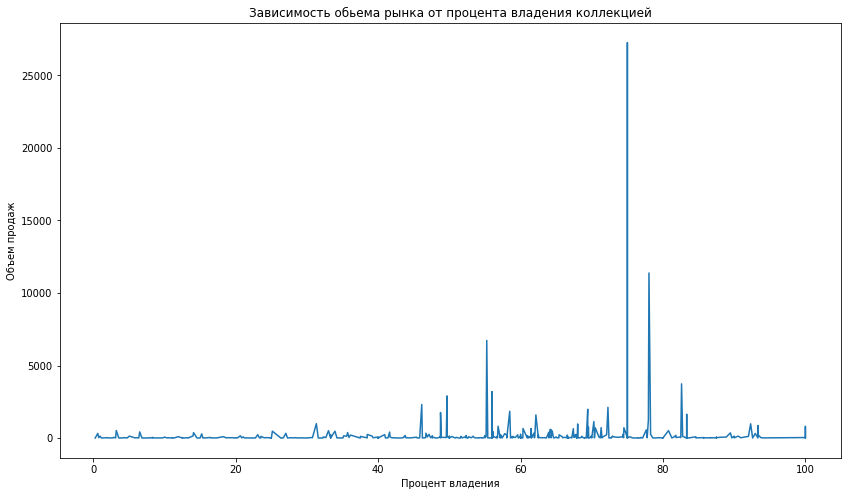

In [11]:
import matplotlib.pyplot as plt
%pylab inline
kor1= df[['Owner_Asset_Ratio',"Volume"]]
Newkor1 = kor1.sort_values(by='Owner_Asset_Ratio')
Newkor1.set_index('Owner_Asset_Ratio', inplace=True)
plt.figure(figsize=(14,8))
plt.title("Зависимость обьема рынка от процента владения коллекцией")
plt.xlabel("Процент владения")
plt.ylabel("Объем продаж")
plt.plot(Newkor1)

#Вывод:
Мы можем видеть зависимость объема продаж по каждой коллекции от процента её владения.
По графику можно сделать вывод, что напрямую эти две переменные никакак не связаны, так как бОльшие показатели по объему продаж показывают коллекции не с максимальным кол-вом владения, а с 50 по 80. А после 80% объем продаж идет на спад с несколькими исключениями.  

In [ ]:
df['NumberOfLetters'] = df['Name'].apply(lambda x: len(x))
d=dict()
for i,x in enumerate(df['NumberOfLetters']):
  try:
    if x in d:
      d[x]+=df["Average_Price"][i]
    else:
      d[x]=df["Average_Price"][i]
  except:
    pass
x = np.arange(3, 33, 1)
a=list()
for i in x:
  try:
    a.append(d[i])
  except:
    a.append(10)
y1=np.array(a)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers',  name='Количество букв в имени коллекции'))
fig.update_layout(title="Зависимость между количеством букв и продажами")
fig.update_xaxes(title='Кол-во букв')
fig.update_yaxes(title='Обьем продаж')
fig.show()


#Вывод:
На графике показана зависимость между количеством букв в названии коллекции и объемом продаж.
Заметим, что показатели всех промежутков до 20 букв идут равномерно, после чего идут аналогично при этом имеется небольшой спад с 19 на 21 букву. При этом есть большой скачок при 20 буквах в названии.

Populating the interactive namespace from numpy and matplotlib


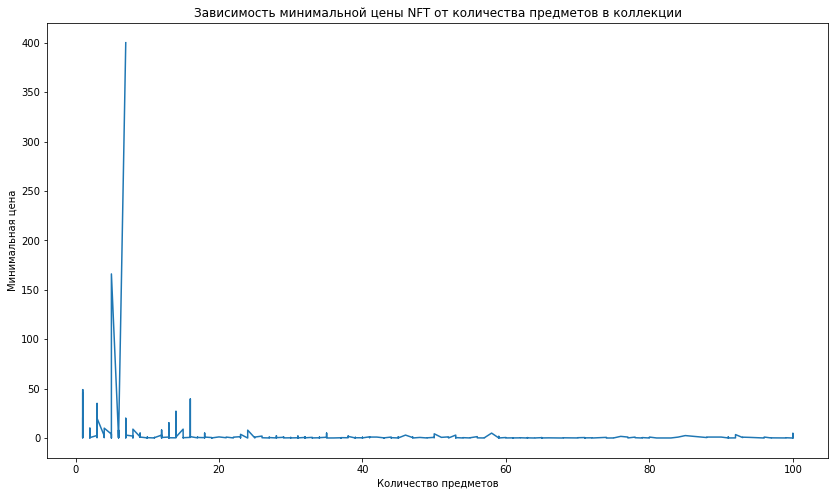

In [13]:
import matplotlib.pyplot as plt
%pylab inline
df['Assets1']=df['Assets'].apply(lambda x: x if x <100 else 100)
kor1= df[["Floor_Price",'Assets1']]
Newkor1 = kor1.sort_values(by='Assets1')
Newkor1.set_index('Assets1', inplace=True)
plt.figure(figsize=(14,8))
plt.title("Зависимость минимальной цены NFT от количества предметов в коллекции")
plt.ylabel("Минимальная цена")
plt.xlabel("Количество предметов")
plt.plot(Newkor1)
#Newkor1.plot()


#Вывод: 
Здесь мы видим зависимость минимальной цены NFT от количества предметов в коллекции. <br>
Мы можем наблюдать зависимость коллекций, в которых кол-во продуктов до 17, за исключением некоторых проектов, она представляет собой параболу.


In [ ]:
"""10 Постройте не менее 3-х сводных таблиц. Под каждой таблицей нужно написать комментарий, описывающий тенденции или взаимосвязи, которые удалось выявить в результате её построения. """

In [ ]:
pts = df.pivot_table(['Owners'], index=['Assets'], aggfunc='mean')
pts[1::15]

,Owners
Assets,
1,0.944444
16,9.500000
31,14.666667
46,7.000000
61,38.600000
77,32.000000
97,22.000000
117,3.000000
142,72.000000


#Вывод:
Рассмотрев данную таблицу можем еще раз убедиться в том, что соотношение проданных товаров в коллекции не зависит от общего количества товаров в коллекции. Ведь зачастую их резкий скачок зависит от рекламной кампании NFT.

In [ ]:
pts=df.pivot_table(['Volume', 'Assets', 'Owners', 'Market_Cap_USD'], index=['Sales'], aggfunc='mean')
pts[::15]

,Assets,Market_Cap_USD,Owners,Volume
Sales,,,,
0,58.333333,0.000000,6.888889,0.000000
15,23.000000,636.069415,12.153846,15.284615
30,21.333333,367.582582,10.166667,20.753333
45,74.000000,0.000000,54.000000,88.150000
61,141.000000,3371.406686,22.000000,14.620000
81,152.000000,11158.320000,16.000000,18.650000
99,0.000000,0.000000,0.000000,467.200000
127,42.000000,0.000000,26.000000,87.010000
177,54.000000,594.621000,36.000000,9.580000


#Вывод:
Можно сделать вывод, что количество продаж не зависит от других переменных. ТК в большинстве своем на это влияют рекламные кампании и привелегии, которые они дают. 

In [ ]:
df['NewSum']=df['Assets']*df['Floor_Price_USD']
pts=df.pivot_table(['NewSum'], index=['Market_Cap_USD'], aggfunc='mean')
pts[1::13]

,NewSum
Market_Cap_USD,
53,42.5778
293,234.9120
572,1202.4558
726,1453.5180
991,991.0350
1174,845.6832
1321,1218.6060
1660,515.3382
2337,2337.3744


#Вывод:
Рыночная капитализация прямопорциональна произведению количества товаров и их стартовой стоимости. 

In [ ]:
df.dropna()

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo,DiffAverageMin,CategoryOfOAR,Assets1,NumberOfLetters,NewSum
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...,5134.540100,good,16,13,92790.2400
5,5,I'M AIKO,2904.70,4.264681e+05,2530.877143,371583,1411,1.20,176.1840,2.058611,302.245254,599,1206,49.67,"Art,Collectibles,Graphics,2D,Image",https://aiko.io,https://content.solsea.io/files/thumbnail/1633...,126.061254,middle,50,8,212477.9040
9,9,Meta Waifus,1844.59,2.708227e+05,989.491267,145277,1156,1.27,186.4614,1.595666,234.275695,376,643,58.48,"3D,PFP,Metaverse,Art,Collectibles",https://metawaifus.com,https://content.solsea.io/files/thumbnail/1637...,47.814295,middle,50,11,119894.6802
12,12,Hot Bunnies NFT,1590.89,2.335745e+05,527.850000,77498,412,1.00,146.8200,3.861383,566.928325,243,391,62.15,"Digital,Metaverse,Art,Picture,Image",https://hotbunniesnft.com/,https://content.solsea.io/files/thumbnail/1637...,420.108325,good,50,15,57406.6200
13,13,BOSS BULLS ™ CLUB,1236.33,1.815180e+05,244.686667,35924,370,1.49,218.7618,3.341432,490.589110,99,127,77.95,"Art,Digital,PFP,3D",https://www.bossbullsclub.com,https://content.solsea.io/files/thumbnail/1637...,271.827310,good,50,17,27782.7486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,575,META OCEAN BOX,2.65,3.890730e+02,4.095455,601,11,0.20,29.3640,0.240909,35.370273,13,17,76.47,"Digital,3D,2D,Graphics,Metaverse",https://www.MetaOceanBox.com/,https://content.solsea.io/files/thumbnail/1641...,6.006273,good,17,14,499.1880
578,584,Cannababy Society,1.00,1.468200e+02,13.000000,1908,1,1.00,146.8200,1.000000,146.820000,1,13,7.69,"Digital,Metaverse,Collectibles,Art,3D",https://www.everythingnft.online/cannababy,https://content.solsea.io/files/thumbnail/1642...,0.000000,middle,13,17,1908.6600
579,585,Mountain Lionz,1.00,1.468200e+02,5.916667,868,12,0.09,13.2138,0.083333,12.235000,49,71,69.01,"Collectibles,Art",https://www.mountainlionz.com,https://content.solsea.io/files/thumbnail/1641...,-0.978800,good,71,14,938.1798
580,586,AI Motion Art,0.70,1.027740e+02,0.000000,0,1,0.50,73.4100,0.700000,102.774000,6,24,25.00,"Digital,Physical,Art,Painting",https://aimotionart.com,https://content.solsea.io/files/thumbnail/1634...,29.364000,middle,24,13,1761.8400


In [ ]:
"""11 Рассчитайте описательные статистики, характеризующие центральную тенденцию и разброс значений относительно меры центральной тенденции по всей выборке и по отдельным группам наблюдений.  Под каждым выводом напишите комментар"""
df.describe()

,Index,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,DiffAverageMin,Assets1,NumberOfLetters,NewSum
count,592.000000,592.000000,5.920000e+02,592.000000,592.000000,592.000000,544.000000,544.000000,592.000000,592.000000,592.000000,592.000000,543.000000,544.000000,592.000000,592.000000,544.000000
mean,296.547297,197.548885,2.900413e+04,45.134817,6626.466216,164.491554,2.423015,355.747019,2.373566,348.486991,53.731419,116.694257,54.385672,-119.174509,34.457770,13.326014,7383.019128
std,172.520622,1283.031435,1.883747e+05,179.327166,26328.741804,451.321395,18.982148,2786.959001,15.035229,2207.472329,133.893752,251.598765,27.632770,2729.636940,24.687384,4.714897,24385.676135
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.020000,2.936400,0.000000,0.000000,0.000000,0.000000,0.260000,-58286.952720,0.000000,3.000000,36.705000
25%,147.750000,7.300000,1.071786e+03,0.000000,0.000000,11.000000,0.110000,16.150200,0.306029,44.931155,4.000000,10.000000,33.330000,1.051194,10.000000,10.000000,880.920000
50%,295.500000,18.595000,2.730118e+03,0.000000,0.000000,35.000000,0.300000,44.046000,0.720412,105.770928,15.000000,38.000000,57.250000,20.974286,38.000000,13.000000,2073.098400
75%,444.250000,80.825000,1.186673e+04,21.841974,3206.750000,107.250000,1.000000,146.820000,1.596750,234.434771,44.000000,102.250000,72.845000,74.620901,50.000000,16.000000,5219.451000
max,599.000000,27256.630000,4.001818e+06,2530.877143,371583.000000,5229.000000,400.000000,58728.000000,347.500000,51019.950000,2041.000000,3320.000000,100.000000,5134.540100,99.000000,41.000000,411096.000000


#Выводы: 
1)Можно заметить очень большу. разницу в объеме, что 75% рынка меньше 80 SOL, а максимальная составляет 27000 SOL, что говорит нам о негармоничном ценообразовании(трудно поддается рассчетам) <br>
2)Видно, что 50% коллекций NFT имеют 0 рыночную капитализацию, что говорит нам о нерелентабельности данного товара <br>
3)50% NFT стоят менне 45$ 
4)Не смотря на нестабильные распределения показателей, Owner_Asset_Ratio имеет правильное распределение с точки зрения статитстики

In [ ]:
"""12.Посчитайте корреляции между числовыми данными и интерпретируйте полученные результаты."""
df.corr()

,Index,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,DiffAverageMin,Assets1,NumberOfLetters
Index,1.000000,-0.230818,-0.230818,-0.313816,-0.313815,-0.399051,-0.034303,-0.034303,-0.132229,-0.132229,-0.296293,-0.299876,-0.175728,-0.019504,-0.172614,-0.023441
Volume,-0.230818,1.000000,1.000000,0.356760,0.356760,0.239926,0.069714,0.069714,0.201824,0.201824,0.146440,0.128694,0.065502,0.086885,0.010746,0.031038
Volume_USD,-0.230818,1.000000,1.000000,0.356760,0.356760,0.239926,0.069714,0.069714,0.201824,0.201824,0.146440,0.128694,0.065502,0.086885,0.010746,0.031038
Market_Cap,-0.313816,0.356760,0.356760,1.000000,1.000000,0.404380,-0.009351,-0.009351,0.021315,0.021315,0.419220,0.539007,-0.095406,0.038391,0.155285,0.016863
Market_Cap_USD,-0.313815,0.356760,0.356760,1.000000,1.000000,0.404378,-0.009350,-0.009350,0.021316,0.021316,0.419218,0.539005,-0.095406,0.038391,0.155281,0.016863
Sales,-0.399051,0.239926,0.239926,0.404380,0.404378,1.000000,-0.034393,-0.034393,-0.028473,-0.028473,0.811492,0.753750,0.026297,0.026167,0.196890,0.076762
Floor_Price,-0.034303,0.069714,0.069714,-0.009351,-0.009350,-0.034393,1.000000,1.000000,0.207434,0.207434,-0.044461,-0.052243,0.092825,-0.966876,-0.139308,0.087529
Floor_Price_USD,-0.034303,0.069714,0.069714,-0.009351,-0.009350,-0.034393,1.000000,1.000000,0.207434,0.207434,-0.044461,-0.052243,0.092825,-0.966876,-0.139308,0.087529
Average_Price,-0.132229,0.201824,0.201824,0.021315,0.021316,-0.028473,0.207434,0.207434,1.000000,1.000000,-0.041485,-0.049250,0.086420,0.049134,-0.123968,0.047538
Average_Price_USD,-0.132229,0.201824,0.201824,0.021315,0.021316,-0.028473,0.207434,0.207434,1.000000,1.000000,-0.041485,-0.049250,0.086420,0.049134,-0.123968,0.047538


#Вывод:
Показатели корреляции мало нам о чем говорят в связи с тем, что мы рассматриваем NFT, которые по сути основаны на искусстве и привелегиях, на что играют большую роль рекламные кампании и современные тенденции, нежели другие параметры. Даже те корреляции, которые были выявлены в жизни себя не могут оправдать, тк имеют слишком сильный разброс параметров.


#Общие выводы:<br>
1.Чаще всего люди покупают следующие категории NFT: искусство, коллекционные и цифровые. <br>2. Самый большой объем продаж занимают следующие категории: коллекционные, цифровые и дающие привилегии. 
<br>3. Объем продаж никак не зависит от процента владения коллекцией. А максимальное значение достигается при 75% владения. 
<br>4. Зависимость минимальной цены и количества была обнаружена на маленьких значения в виде параболы. На больших значениях её нет. 
<br>5. Между количеством букв в названии и средней ценой NFT коллекции - нет зависимости. А максимум достигается при 20 буквах в названии. 
<br>6. Видна гигантская разница в объеме, что 75% рынка меньше 80 SOL, а максимальная составляет 27000 SOL, что говорит нам о негармоничном ценообразовании(трудно поддается рассчетам) 
<br>7. Несмотря на нестабильные распределения показателей, Owner_Asset_Ratio(процент владения коллекцией) имеет правильное распределение с точки зрения статистики. 
<br>8. Полученные показатели мало нам о чем говорят в связи с тем, что мы рассматриваем NFT, которые по сути основаны на искусстве и привелегиях, на что играют большую роль рекламные кампании и современные тенденции, нежели другие параметры. Даже те корреляции, которые были выявлены в жизни себя не могут оправдать, тк имеют слишком сильный разброс параметров.